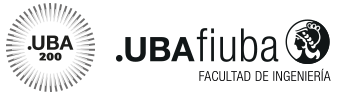

# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA

# <center> Ecuaciones no Lineales - Segunda Parte

    
## <center> Métodos de refinamiento: Aproximaciones Sucesivas o de Punto Fijo
***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*

## <center> CASO A ANALIZAR
 
La longitud de onda de una ola en aguas poco profundas es:

$$L=\frac{g\cdot T^2}{2\pi}\cdot \tanh\left(\frac{2\cdot\pi\cdot d}{L}\right), $$
con:
- $L$: longitud de onda.
- $g$: aceleración de la gravedad.
- $T$: período de la ola.
- $d$: profundidad del mar.



Hallar $p$ tal que $f(p)=0,$ $p  \in [10,150]$ con:

$$f(x)=\frac{2\,\pi\, d}{\text{atanh}\left(\displaystyle\frac{2\,\pi\,x}{g\cdot T^2}\right)}-x$$


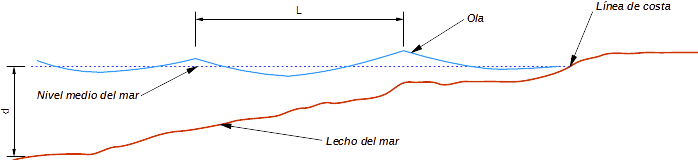

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$




### Método de las Aproximaciones Sucesivas o Punto Fijo
___
Partiendo de la formulación del problema tenemos que:
$$ f(x)=0 $$
Escribimos el problema de manera levemente diferente, incorporando una nueva función $g(x)$:
$$ f(x)=x-g(x)=0 $$

De esta manera resulta muy sencillo despejar $x$ a partir de suponer que:
$$ x=g(x)$$

Como estamos resolviendo de forma iterativa la  expresión que queda es:

$$ x_{j+1}=g(x_j)$$

Como se trata de un proceso iterativo, hay que propner de un valor inicial $x_0$, también llamado valor «semilla».

### Principales pasos a seguir para resolver por punto fijo:
___

1. Seleccionar un valor inicial $x_0$ dentro del intervalo $[a,b]$ y una función $g(x)$. 
2. Con el valor inicial $x_0$, comenzar a iterar en la sucesión  $ x_{i+1}=g(x_i)$
3. Si el método _no converge_, probar cambiando el valor inicial. 
4. Si sigue sin converger, probar con otra función $g(x)$ y continuar iterando.
5. ¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte (repasar presentación anterior)

In [3]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#Método del Punto Fijo
def punto_fijo(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('xi','gi'))
        x0 = x0 
        contador = 0  
        x1 = g(x0)
        while (contador < itmax) and (abs((x1 - x0)/x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = g(x0)                 
            contador += 1
        er=abs((x1-x0)/x1)
        print('El \033[1mMétodo de Punto Fijo \033[0mconvergió en',contador,'iteraciones, el resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df


Aplicamos el <b>Método de Aproximaciones Sucesivas</b> o <b>Punto Fijo</b> con la siguiente función $g(x)$:

$$ g(x)=\frac{2\,\pi\, 14}{\text{arctanh}\left(\displaystyle\frac{2\,\pi\,x}{9.80665\cdot 12^2}\right)},$$

y un valor inicial $x_0=10$.

In [4]:
#Definición del valor inicial y la Tolerancia
X0=10
tolerancia=10**(-8)

def f(x):#definimos la función con la que vamos a trabajar
    return (2*np.pi*14)/np.arctanh(2*np.pi*x/(9.80665*12**2))-x   #deben cambiar la función si quieren probar otra 

def g(x):#definimos la función g 
    return  (2*np.pi*14)/np.arctanh(2*np.pi*x/(9.80665*12**2))  # deben cambiar la función si quieren probar otra 

ejemplo=punto_fijo(X0, tolerancia)


El Método de Punto Fijo convergió en 1 iteraciones, el resultado es: nan m y el error relativo es nan . El valor de la función resulta nan m.


C:\Users\rodol\AppData\Local\Temp\ipykernel_13232\476033002.py:9: RuntimeWarning: invalid value encountered in arctanh
  return  (2*np.pi*14)/np.arctanh(2*np.pi*x/(9.80665*12**2))  # deben cambiar la función si quieren probar otra


Podemos ver que la rutina nos avisa que no puede obtener la raíz («[...] <i>el resultado es: nan m</i> [...]») y sólo pudo efectuar una iteración.

In [5]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xi
xuno = ejemplo.gi
print ("Analicemos las primeras iteraciones. \n")  

for p in range (10):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "x_{"+str(p)+"}= "+str(xcero[p])+"\ y\ x_"+str(p+1)+"=g(x_{"+str(p)+"})= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos las primeras iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


KeyError: 1

Cuando analizamos las iteraciones, la primera funciona pero la siguiente da un problema y no puede seguir iterando.

Es importante notar que el valor de la primera iteración está <b>fuera</b> del intervalo original.

C:\Users\rodol\AppData\Local\Temp\ipykernel_17460\476033002.py:6: RuntimeWarning: invalid value encountered in arctanh
  return (2*np.pi*14)/np.arctanh(2*np.pi*x/(9.80665*12**2))-x   #deben cambiar la función si quieren probar otra
C:\Users\rodol\AppData\Local\Temp\ipykernel_17460\476033002.py:9: RuntimeWarning: invalid value encountered in arctanh
  return  (2*np.pi*14)/np.arctanh(2*np.pi*x/(9.80665*12**2))  # deben cambiar la función si quieren probar otra


KeyError: 1

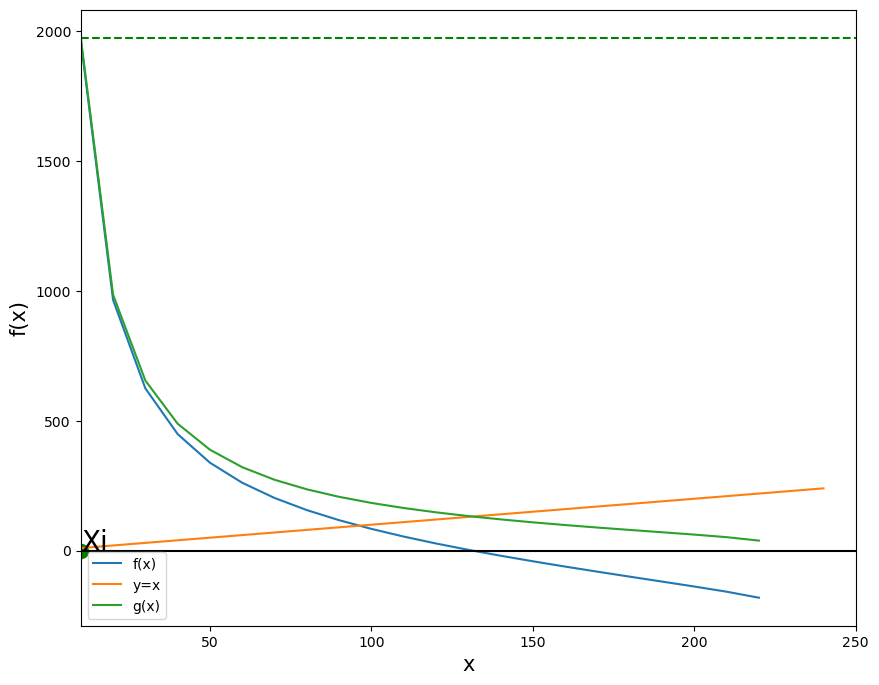

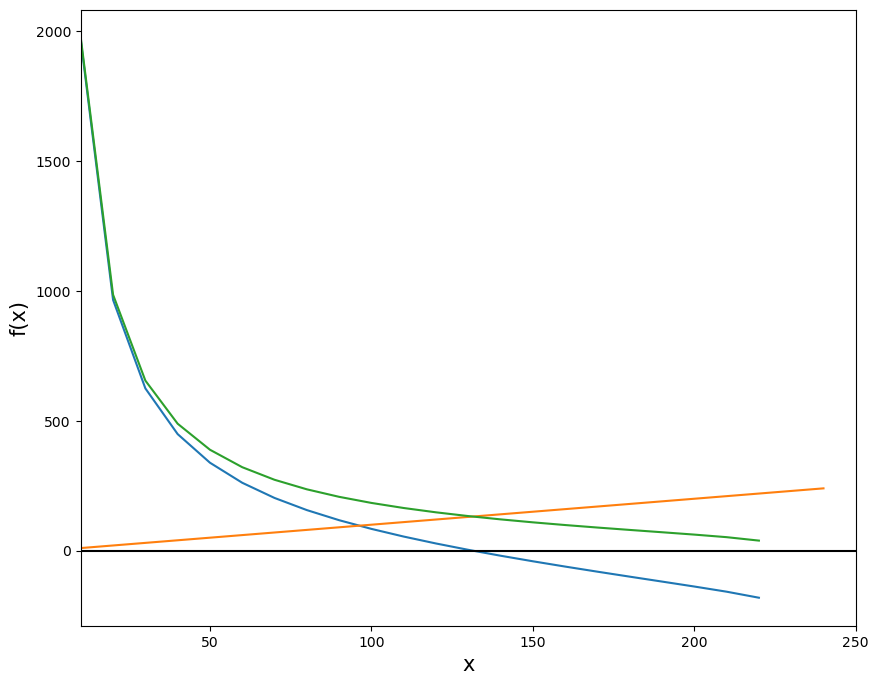

In [5]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 250, 10);
y = f(ejex)

def i(x):#definimos la función =x
    return x

for p in range (7):
    fig = plt.figure(figsize=(10,8))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(10,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, i(ejex))
    plt.plot(ejex, g(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='green', s=100)
    plt.annotate("Xi", (xcero[p], 0),fontsize=20)
    plt.plot([xcero[p],xcero[p]], [0,xuno[p]], color='g',linestyle='dashed')
    plt.plot([xcero[p],xuno[p]], [xuno[p],xuno[p]], color='g',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='m', s=100)
    plt.annotate("Xi+1", (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','y=x','g(x)'],fontsize=10)
    plt.plot([xuno[p],xuno[p]], [xuno[p],0], color='m',linestyle='dashed')
    
    #plt.axvline(x=x[p], color='g',linestyle='dashed') 
    #plt.axvline(x=a[p], color='m') 
    #plt.axvline(x=b[p], color='m'); 

En los gráficos se puede observar que existe la raíz (la función $f(x)$ cruza el eje «x»), pero el método no converge.

In [13]:
print('Resumen de resultados para el \033[1mMétodo de las Aproximaciones Sucesivas \033[0mo de \033[1mPunto Fijo\033[0m:')
print('Veamos las primeras quince (15) iteraciones:')
ejemplo.head(15)

Resumen de resultados para el Método de las Aproximaciones Sucesivas o de Punto Fijo:
Veamos las primeras quince (15) iteraciones:


,xi,gi
0,10.0,1975.715333


In [6]:
print('Y ahora las últimas quince (15) iteraciones:')
ejemplo.tail(15)

Y ahora las últimas quince (15) iteraciones:


,xi,gi
0,10.0,1975.715333


Nuevamente, podemos notar que el único valor obtenido, $x_1$, está completamente <b>fuera</b> del intervalo original $(10;150)$.

Con la función elegida, el método <b>no</b> converge. Debemos buscar una función $g(x)$ que converja.

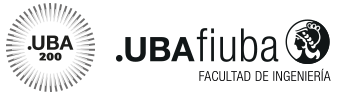



# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?

## <center> Ecuaciones no Lineales - Segunda Parte

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.